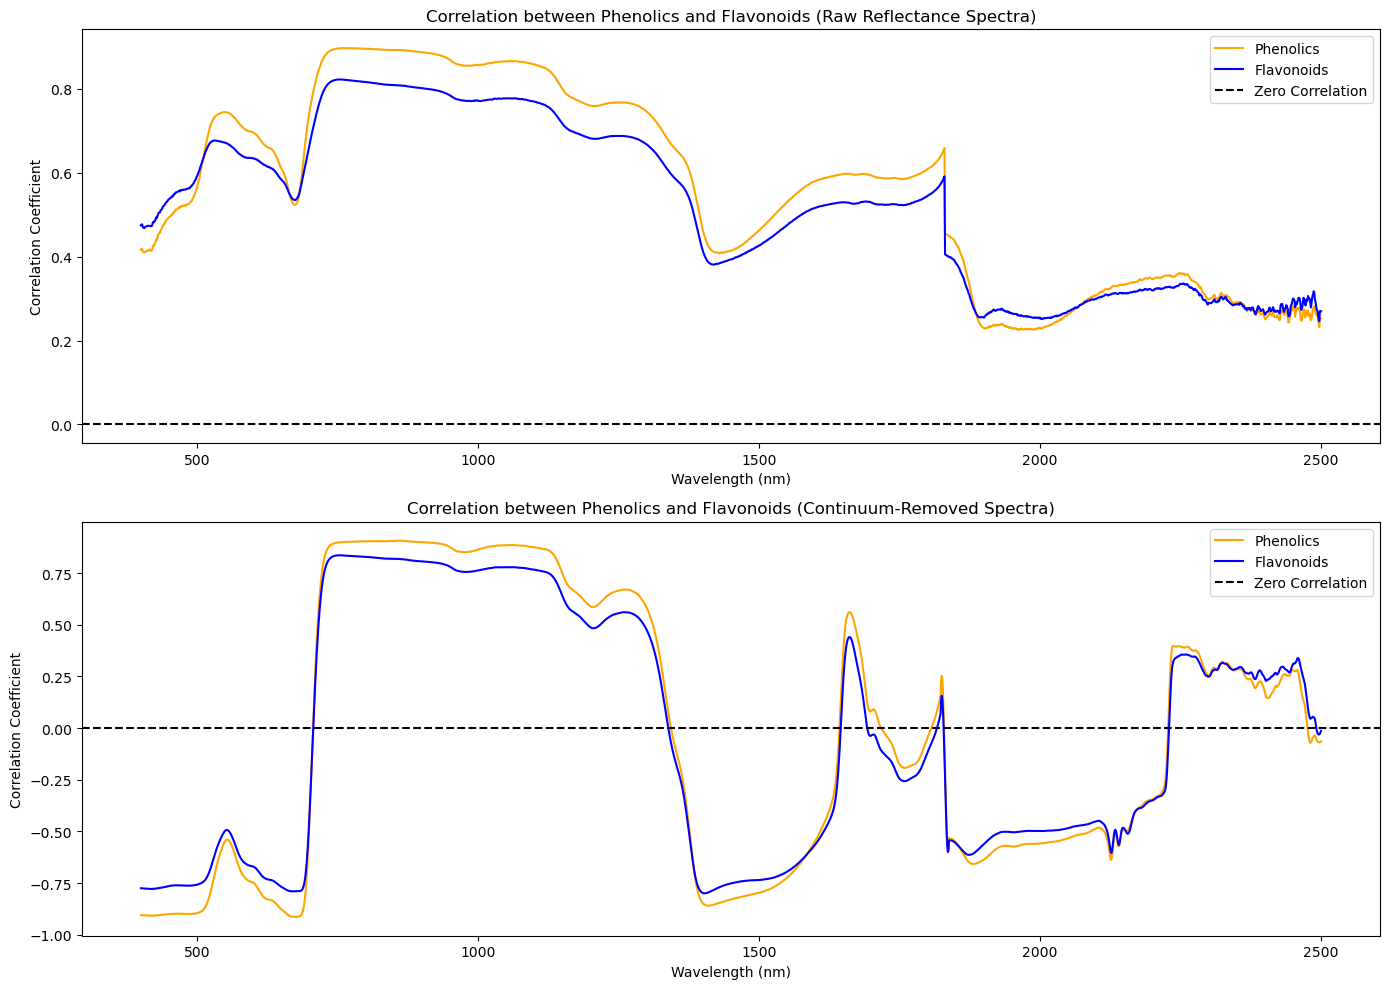

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import detrend, savgol_filter

# Load the data
dataframe_path = r"C:\Users\bongo\OneDrive\Desktop\Phenolic compound\fire.xlsx"
try:
    df = pd.read_excel(dataframe_path)
except Exception as e:
    print(f"Error loading the data: {e}")
    exit()

# Prepare the feature (X) and target (y) variables
X = df.iloc[:, 3:]  # Raw spectral data (400 to 2500 nm)
flavonoids = df.iloc[:, 1]  # Flavonoids column
phenolics = df.iloc[:, 2]   # Phenolics column

# Perform continuum removal using scipy.signal.detrend
X_cont_removed = np.zeros_like(X.values)
for i in range(X.shape[0]):
    spectrum = X.iloc[i, :].values
    X_cont_removed[i, :] = detrend(spectrum, axis=-1)

# Calculate the correlation between Phenolics and Flavonoids for raw reflectance spectra
raw_corr_phenolics = np.corrcoef(phenolics, X.T)[0, 1:]  # Correlation with Phenolics
raw_corr_favonoids = np.corrcoef(flavonoids, X.T)[0, 1:]  # Correlation with Flavonoids

# Calculate the correlation between Phenolics and Flavonoids for continuum-removed spectra
cont_removed_corr_phenolics = np.corrcoef(phenolics, X_cont_removed.T)[0, 1:]
cont_removed_corr_favonoids = np.corrcoef(flavonoids, X_cont_removed.T)[0, 1:]

# Apply Savitzky-Golay smoothing only to continuum-removed spectra
smooth_cont_removed_corr_phenolics = savgol_filter(cont_removed_corr_phenolics, window_length=15, polyorder=2)
smooth_cont_removed_corr_favonoids = savgol_filter(cont_removed_corr_favonoids, window_length=15, polyorder=2)

# Plot the correlation coefficients
plt.figure(figsize=(14, 10))

# Subplot for raw reflectance spectra
plt.subplot(2, 1, 1)
wavelengths = X.columns
plt.plot(wavelengths, raw_corr_phenolics, color='orange', label='Phenolics')
plt.plot(wavelengths, raw_corr_favonoids, color='blue', label='Flavonoids')
plt.axhline(y=0.0, color='k', linestyle='--', label='Zero Correlation')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between Phenolics and Flavonoids (Raw Reflectance Spectra)')
plt.legend()
plt.grid(False)

# Subplot for continuum-removed spectra
plt.subplot(2, 1, 2)
plt.plot(wavelengths, smooth_cont_removed_corr_phenolics, color='orange', label='Phenolics')
plt.plot(wavelengths, smooth_cont_removed_corr_favonoids, color='blue', label='Flavonoids')
plt.axhline(y=0.0, color='k', linestyle='--', label='Zero Correlation')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between Phenolics and Flavonoids (Continuum-Removed Spectra)')
plt.legend()
plt.grid(False)

plt.tight_layout()  # Improve layout
plt.show()